# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/datasets/ealaxi/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn #install the library directly in anaconda (conda install -c conda-forge imbalanced-learn)

# Import libraries from sklearn package

from sklearn.model_selection import train_test_split

In [118]:
data = pd.read_csv('/Users/GiadaSartori/Documents/IRONHACK/Lab/Week7/lab-imbalance/Datasets/Fraud Detection.csv')
data


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [119]:
data.shape

(6362620, 11)

In [120]:
fraud_det = data.sample(n=100000, replace='False') #default False does not allow sampling of the same row more than once.
fraud_det

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2226581,186,PAYMENT,6317.28,C1856665188,3670.72,0.00,M1218296243,0.00,0.00,0,0
2440728,203,CASH_IN,190083.76,C1285010803,955882.08,1145965.84,C644543056,2024121.57,1834037.81,0,0
1666694,158,PAYMENT,15948.97,C2015381795,50070.00,34121.03,M44142032,0.00,0.00,0,0
2374300,191,PAYMENT,69.15,C1785619863,49959.00,49889.85,M561317473,0.00,0.00,0,0
2727218,212,CASH_IN,84148.16,C2066925133,16630972.22,16715120.38,C1413349992,627869.28,543721.12,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6040828,490,PAYMENT,5924.29,C795004277,353728.06,347803.78,M2047380068,0.00,0.00,0,0
4735836,332,CASH_OUT,980.62,C881145663,82573.00,81592.38,C459157323,162609.13,163589.74,0,0
2556748,206,PAYMENT,14199.37,C573421828,882753.39,868554.02,M1917957767,0.00,0.00,0,0
4865548,348,CASH_OUT,399247.97,C1169524396,204248.00,0.00,C1920822318,79236.32,478484.30,0,0


### What is the distribution of the outcome? 

### EDA Steps

1. Explore the data and identify datatypes:
    - Dataset consists of 11 columns, of which 6 are numerical, and 5 categorical
2. Identify features and labels
    - isFraud and isFlagged Fraud can both be considered our labels, target on which we want our choosen model to be trained
    - The rest can be considered our features, however before deciding e.g., which features to keep and which to drop, we need to see their correlation with our target

In [121]:
fraud_det.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [122]:
fraud_counts = fraud_det['isFraud'].value_counts()
fraud_counts

0    99871
1      129
Name: isFraud, dtype: int64

In [123]:
fraud_det['isFlaggedFraud'].value_counts()

0    99999
1        1
Name: isFlaggedFraud, dtype: int64

#### First considerations:

- Based on the above findings, we can consider the column 'isFraud' our label, or target, which emcompasses two unique values:
    - 0 for non fraudulent detected cases
    - 1 for fraudulent detected cases
- Hence, we could potentially drop the column isFlaggedFraud

#### Visualization of the data

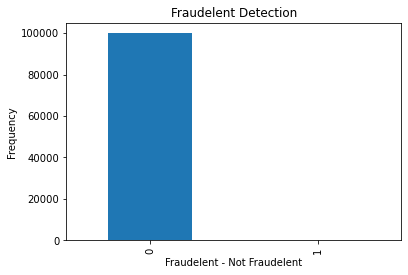

In [124]:
# Bar Chart

fig = fraud_counts.plot(kind='bar')

fig.set_title("Fraudelent Detection")
fig.set_xlabel("Fraudelent - Not Fraudelent")
fig.set_ylabel("Frequency")

plt.show()


/var/folders/vy/72w35wd12ms4_h7n214795k40000gn/T/ipykernel_94578/1164168794.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


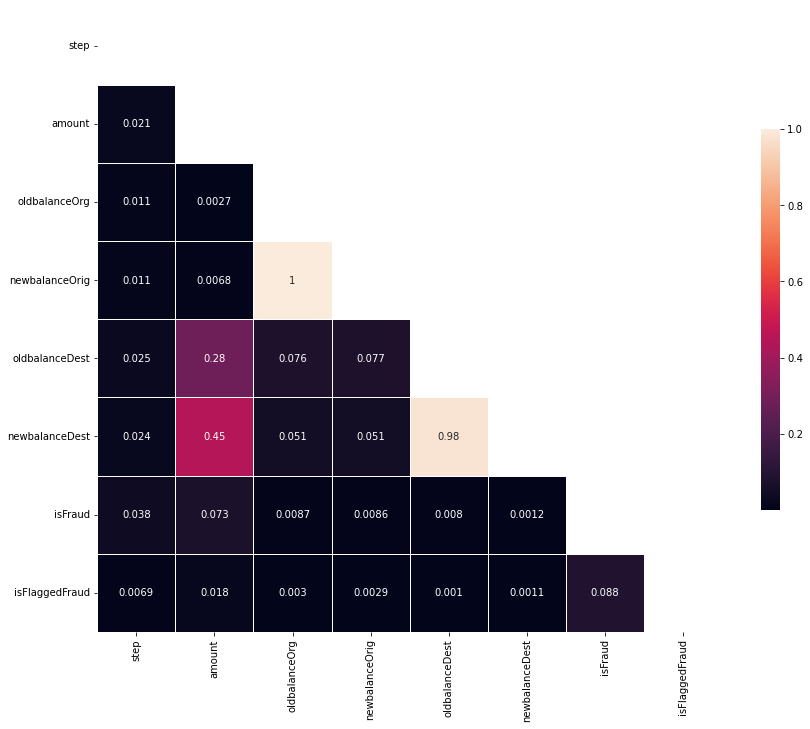

In [125]:
# Heatmap

corr = np.abs(fraud_det.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

#### Additional considerations:

- We can clearly drop isFlaggedFraud, which means that our label or target is "isFraud"
- Based on the correlation between our label and the features, we could consider to drop the following columns:
    1) newbalanceDest (0.0019)
    2) oldbalanceDest (0.0045)
- Given the datatypes and the intention to use a Logisitic Regression, we also want to:
    1) Transform type into dummy
    2) Merge the two datasets into a new one
    2) Drop categorical columns from newly created dataset, which are:
    - nameOrig
    - nameDest

##### Create dummmy for type unique values

In [126]:
fraud_det['type'].value_counts()

CASH_OUT    35093
PAYMENT     34147
CASH_IN     21886
TRANSFER     8235
DEBIT         639
Name: type, dtype: int64

In [127]:
type_dummies = pd.get_dummies(fraud_det['type'], prefix='type') #prefix is to remember that we passed a specific column from the original dataframe
type_dummies

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
2226581,0,0,0,1,0
2440728,1,0,0,0,0
1666694,0,0,0,1,0
2374300,0,0,0,1,0
2727218,1,0,0,0,0
...,...,...,...,...,...
6040828,0,0,0,1,0
4735836,0,1,0,0,0
2556748,0,0,0,1,0
4865548,0,1,0,0,0


##### Merge the two dataframes

In [128]:
fraud_det_transformed = pd.merge(left=fraud_det, right=type_dummies, left_index=True, right_index=True)
fraud_det_transformed

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
21,1,DEBIT,9302.79,C1566511282,11299.00,1996.21,C1973538135,29832.00,16896.70,0,0,0,0,1,0,0
72,1,CASH_OUT,94253.33,C1718906711,25203.05,0.00,C977993101,99773.00,965870.05,0,0,0,1,0,0,0
160,1,CASH_OUT,53631.83,C1233595751,0.00,0.00,C757108857,83244.00,0.00,0,0,0,1,0,0,0
221,1,PAYMENT,7707.44,C1108889615,99827.00,92119.56,M1275028674,0.00,0.00,0,0,0,0,0,1,0
226,1,PAYMENT,4391.44,C1865219266,228.00,0.00,M2138005960,0.00,0.00,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362439,729,CASH_OUT,1102951.39,C1678410175,1102951.39,0.00,C228891434,0.00,1102951.39,1,0,0,1,0,0,0
6362443,730,CASH_OUT,1152538.90,C1040108506,1152538.90,0.00,C1101565058,0.00,1152538.90,1,0,0,1,0,0,0
6362495,732,CASH_OUT,1157971.07,C1123625591,1157971.07,0.00,C355172230,2974237.06,4132208.13,1,0,0,1,0,0,0
6362536,736,TRANSFER,172915.56,C809421762,172915.56,0.00,C922949520,0.00,0.00,1,0,0,0,0,0,1


##### Drop columns

In [129]:
columns_to_drop = ['isFlaggedFraud', 'nameOrig', 'nameDest', 'type']

In [130]:
fraud_det_transformed = fraud_det_transformed.drop((columns_to_drop), axis=1)

In [131]:
fraud_det_transformed

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
21,1,9302.79,11299.00,1996.21,29832.00,16896.70,0,0,0,1,0,0
72,1,94253.33,25203.05,0.00,99773.00,965870.05,0,0,1,0,0,0
160,1,53631.83,0.00,0.00,83244.00,0.00,0,0,1,0,0,0
221,1,7707.44,99827.00,92119.56,0.00,0.00,0,0,0,0,1,0
226,1,4391.44,228.00,0.00,0.00,0.00,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362439,729,1102951.39,1102951.39,0.00,0.00,1102951.39,1,0,1,0,0,0
6362443,730,1152538.90,1152538.90,0.00,0.00,1152538.90,1,0,1,0,0,0
6362495,732,1157971.07,1157971.07,0.00,2974237.06,4132208.13,1,0,1,0,0,0
6362536,736,172915.56,172915.56,0.00,0.00,0.00,1,0,0,0,0,1


### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

Since we don't know what step means, we would not touch it: we don't transform into ordinal datetype, nor we drop it.
### THANK YOU GLADYIS FOR THE TIPS!


### Run a logisitc regression classifier and evaluate its accuracy.

1. Identify the features and the labels
2. Do the train-test split, with a default test size of 25% (since it is not specified)
3. Choose a model, and create an empty model to train
3. Evaluate the model with score, then do it with prediction (just in case)

In [132]:
features = fraud_det_transformed.drop(columns=['isFraud'])
labels = fraud_det_transformed['isFraud']

print(features.head())
print(labels.head())

     step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
21      1   9302.79       11299.00         1996.21         29832.0   
72      1  94253.33       25203.05            0.00         99773.0   
160     1  53631.83           0.00            0.00         83244.0   
221     1   7707.44       99827.00        92119.56             0.0   
226     1   4391.44         228.00            0.00             0.0   

     newbalanceDest  type_CASH_IN  type_CASH_OUT  type_DEBIT  type_PAYMENT  \
21         16896.70             0              0           1             0   
72        965870.05             0              1           0             0   
160            0.00             0              1           0             0   
221            0.00             0              0           0             1   
226            0.00             0              0           0             1   

     type_TRANSFER  
21               0  
72               0  
160              0  
221              0  
226  

### Now pick a model of your choice and evaluate its accuracy.

In [133]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=0)

In [134]:
from sklearn.linear_model import LogisticRegression

In [135]:
lr_fraud = LogisticRegression(max_iter=100000)

In [136]:
lr_fraud.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [137]:
lr_fraud.score(X_test, y_test)

0.9976779881144476

In [140]:
from sklearn.metrics import classification_report

pred = lr_fraud.predict(X_test)

In [141]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25380
           1       0.23      0.45      0.31        29

    accuracy                           1.00     25409
   macro avg       0.62      0.72      0.65     25409
weighted avg       1.00      1.00      1.00     25409



In [142]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, pred))

[[25337    43]
 [   16    13]]


### Confusion Matrix Results

1. True Negative, position 0-0 --> 25337 cases are not fraudelent
2. False Positive, position 0-1 --> we predict that 43 cases are fraudelenet, when in reality they are not
3. False Negative, position 1-0 --> we predict that 16 cases are not fraudelent, when in reality they are
4. True Positive, position 1-1 --> we predict that 13 cases are fraudelent


Based on these considerations, we need to decrease the **False Negative**, which corresponds to 16 cases

### Which model worked better and how do you know?

We could have considered the Decision Tree Classifier. 

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.